In [17]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import xarray as xr
import torch
from torch.utils.data import Dataset
import os
import pandas as pd
from typing import List
import numpy as np
import cmocean

import DeepFate

from DeepFate import config
from DeepFate.datasets.MCSPrecomputedDataset import MCSPrecomputedDataset

import torch
from torch.utils.data import DataLoader

from tqdm import tqdm
from DeepFate.config import *
from DeepFate.datasets.load_toocan_dyamond import load_TOOCAN_DYAMOND

from DeepFate.datasets.utils import *


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [18]:
path = PATH_TOOCAN_GLOBAL_FILE ###path change with new file
#list_object_mcs = toocan
list_object_mcs = load_TOOCAN_DYAMOND(path) ##change load_toocan
list_valid_mcs = get_list_valid_mcs(list_object_mcs = list_object_mcs,
                   max_area=DeepFate.config.MCS_SPECS_RANGE['max_area'][1],
                    min_area=DeepFate.config.MCS_SPECS_RANGE['max_area'][0],
                    duration_max = DeepFate.config.MCS_SPECS_RANGE['duration_hour'][1], #now in hours
                    duration_min = DeepFate.config.MCS_SPECS_RANGE['duration_hour'][0],
                    lat_max=DeepFate.config.MAX_LAT_TROPICS)

validitity, start_times, end_times = get_validity_lifecycles_start_end(list_valid_mcs)
list_valid_mcs_2 = [list_valid_mcs[i] for i in range(len(list_valid_mcs)) if validitity[i] is True]
list_start_times = [start_times[i] for i in range(len(list_valid_mcs)) if validitity[i] is True]
list_end_times = [end_times[i] for i in range(len(list_valid_mcs)) if validitity[i] is True]
label_all = np.array([list_valid_mcs_2[i].DCS_number for i in range(len(list_valid_mcs_2))])


print('min life cycle', np.min(np.array(list_end_times) - np.array(list_start_times)))

100%|██████████| 72965/72965 [00:04<00:00, 17696.26it/s]


min life cycle 9


In [19]:
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
plt.rcParams.update({'font.size': 18})

In [20]:
%matplotlib inline

Text(0.5, 1.0, 'Surface Evolution in Time')

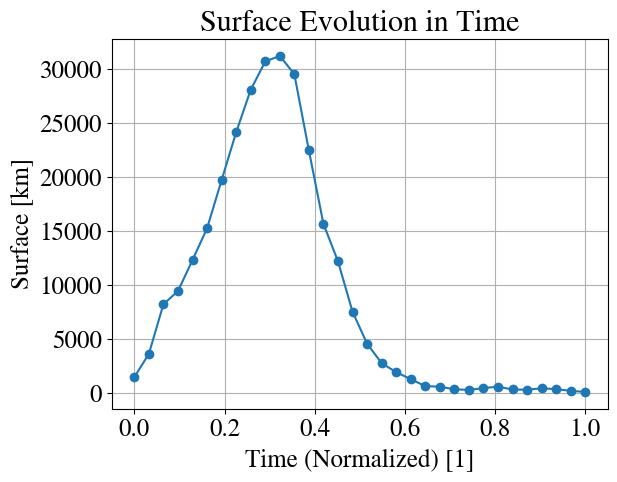

In [29]:
from DeepFate.datasets.utils import get_single_validity_idx_start_idx_end
idx_mcs=1050
mcs_object = list_object_mcs[idx_mcs]
valid, idx_start, idx_end = get_single_validity_idx_start_idx_end(mcs_object, rolling_window=4, gradient_threshold=400, fraction_max_end=0.5, fraction_max_start=0.5)

nt = len(mcs_object.clusters.LC_surfkm2_235K)
plt.plot(np.linspace(0,1,nt), mcs_object.clusters.LC_surfkm2_235K, '-o')
#plt.plot(np.linspace(0,1,nt)[idx_start:idx_end], mcs_object.clusters.surfkm2_172Wm2[idx_start:idx_end], '-o')
plt.grid(True)
plt.xlabel('Time (Normalized) [1]')
plt.ylabel('Surface [km]')
plt.title('Surface Evolution in Time')

Text(0.5, 1.0, 'Filtering with r=1 and t=400')

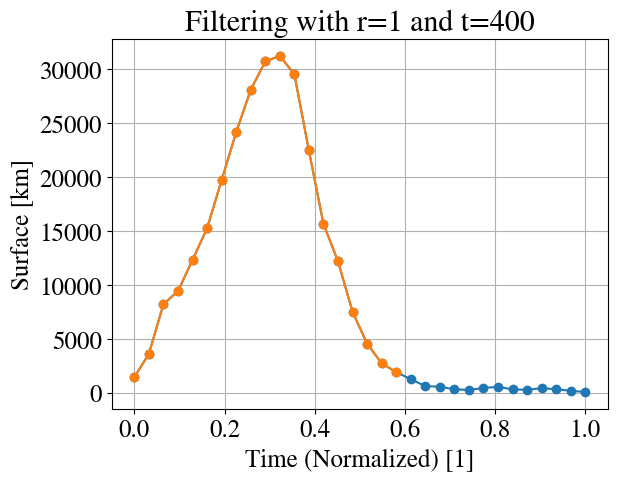

In [30]:
idx_mcs=1050
mcs_object = list_object_mcs[idx_mcs]
valid, idx_start, idx_end = get_single_validity_idx_start_idx_end(mcs_object, rolling_window=1, gradient_threshold=400, fraction_max_end=0.5, fraction_max_start=0.5)

nt = len(mcs_object.clusters.LC_surfkm2_235K)
plt.plot(np.linspace(0,1,nt), mcs_object.clusters.LC_surfkm2_235K, '-o')
plt.plot(np.linspace(0,1,nt)[idx_start:idx_end], mcs_object.clusters.LC_surfkm2_235K[idx_start:idx_end], '-o')
plt.grid(True)
plt.xlabel('Time (Normalized) [1]')
plt.ylabel('Surface [km]')
plt.title('Filtering with r=1 and t=400')

Text(0.5, 1.0, 'Filtering with r=4 and t=400')

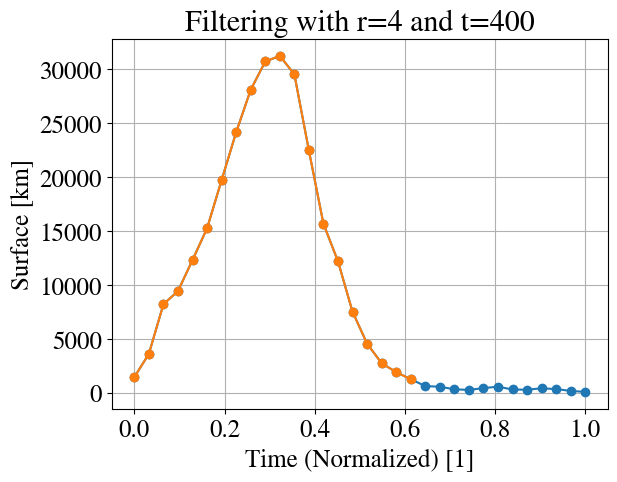

In [31]:
idx_mcs=1050
mcs_object = list_object_mcs[idx_mcs]
valid, idx_start, idx_end = get_single_validity_idx_start_idx_end(mcs_object, rolling_window=4, gradient_threshold=400, fraction_max_end=0.5, fraction_max_start=0.5)

nt = len(mcs_object.clusters.LC_surfkm2_235K)
plt.plot(np.linspace(0,1,nt), mcs_object.clusters.LC_surfkm2_235K, '-o')
plt.plot(np.linspace(0,1,nt)[idx_start:idx_end], mcs_object.clusters.LC_surfkm2_235K[idx_start:idx_end], '-o')
plt.grid(True)
plt.xlabel('Time (Normalized) [1]')
plt.ylabel('Surface [km]')
plt.title('Filtering with r=4 and t=400')

Text(0.5, 1.0, 'Filtering with r=4 and t=300')

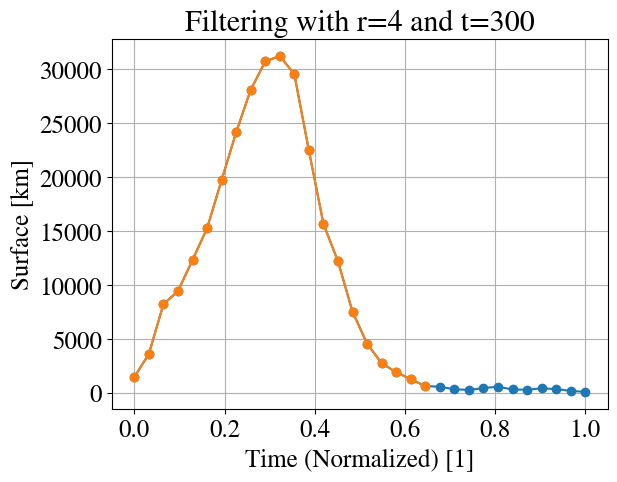

In [32]:
idx_mcs=1050
mcs_object = list_object_mcs[idx_mcs]
valid, idx_start, idx_end = get_single_validity_idx_start_idx_end(mcs_object, rolling_window=4, gradient_threshold=300, fraction_max_end=0.5, fraction_max_start=0.5)

nt = len(mcs_object.clusters.LC_surfkm2_235K)
plt.plot(np.linspace(0,1,nt), mcs_object.clusters.LC_surfkm2_235K, '-o')
plt.plot(np.linspace(0,1,nt)[idx_start:idx_end], mcs_object.clusters.LC_surfkm2_235K[idx_start:idx_end], '-o')
plt.grid(True)
plt.xlabel('Time (Normalized) [1]')
plt.ylabel('Surface [km]')
plt.title('Filtering with r=4 and t=300')

Text(0.5, 1.0, 'Filtering with r=6 and t=400')

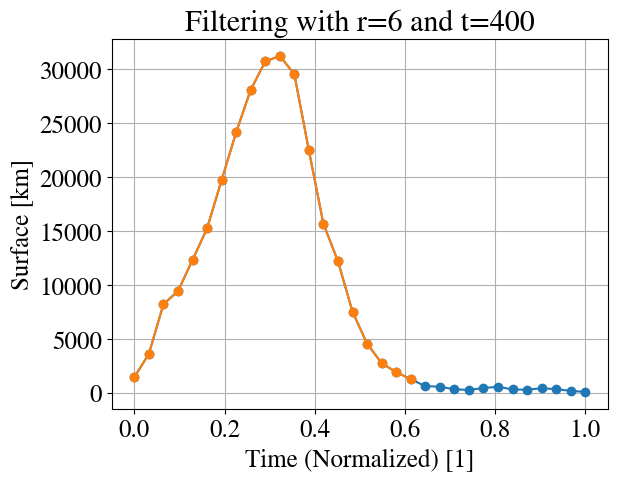

In [33]:
idx_mcs=1050
mcs_object = list_object_mcs[idx_mcs]
valid, idx_start, idx_end = get_single_validity_idx_start_idx_end(mcs_object, rolling_window=6, gradient_threshold=400, fraction_max_end=0.5, fraction_max_start=0.5)

nt = len(mcs_object.clusters.LC_surfkm2_235K)
plt.plot(np.linspace(0,1,nt), mcs_object.clusters.LC_surfkm2_235K, '-o')
plt.plot(np.linspace(0,1,nt)[idx_start:idx_end], mcs_object.clusters.LC_surfkm2_235K[idx_start:idx_end], '-o')
plt.grid(True)
plt.xlabel('Time (Normalized) [1]')
plt.ylabel('Surface [km]')
plt.title('Filtering with r=6 and t=400')

Text(0.5, 1.0, 'Filtering with r=6 and t=300')

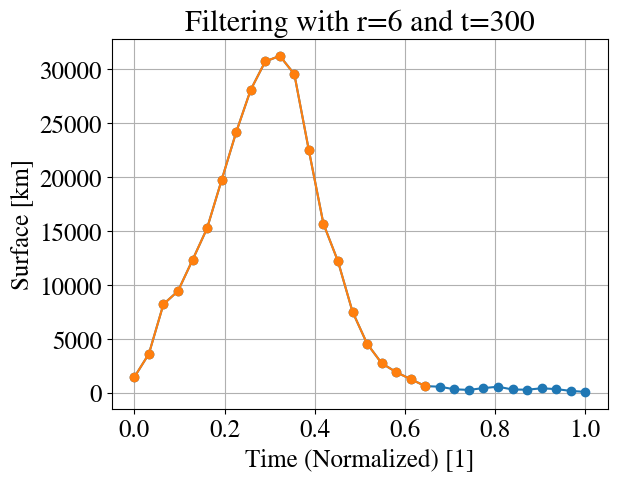

In [38]:
idx_mcs=1050
mcs_object = list_object_mcs[idx_mcs]
valid, idx_start, idx_end = get_single_validity_idx_start_idx_end(mcs_object, rolling_window=6, gradient_threshold=300, fraction_max_end=0.5, fraction_max_start=0.5)

nt = len(mcs_object.clusters.LC_surfkm2_235K)
plt.plot(np.linspace(0,1,nt), mcs_object.clusters.LC_surfkm2_235K, '-o')
plt.plot(np.linspace(0,1,nt)[idx_start:idx_end], mcs_object.clusters.LC_surfkm2_235K[idx_start:idx_end], '-o')
plt.grid(True)
plt.xlabel('Time (Normalized) [1]')
plt.ylabel('Surface [km]')
plt.title('Filtering with r=6 and t=300')

In [39]:
from DeepFate.datasets.utils import get_single_validity_idx_start_idx_end, get_validity_lifecycles_start_end


In [40]:
validity_list, idx_start_list, idx_end_list = get_validity_lifecycles_start_end(list_valid_mcs)

100%|██████████| 72965/72965 [00:04<00:00, 15825.65it/s]


In [42]:

list_rolling_window = [1, 2, 3, 4, 5, 6]
list_gradient_threshold = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]

list_surf_end_prop = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6]

correl_list =[]
remove_list=[]
rolling=4
for gradient_thresholf in list_gradient_threshold:
    validity_list, idx_start_list, idx_end_list = get_validity_lifecycles_start_end(list_valid_mcs, rolling_window=rolling, gradient_threshold=gradient_thresholf)
    duration_list = [(idx_end_list[i] - idx_start_list[i])*0.5 for i in range(len(validity_list)) if validity_list[i]]
    area_max_list = [np.max(list_valid_mcs[i].clusters.LC_surfkm2_235K) for i in range(len(validity_list)) if validity_list[i]]
    df = pd.DataFrame.from_dict({'duration':duration_list, 'maximal_extension':area_max_list})
    #list_corrle.append(df.corr()['duration']['maximal_extension'])

    proportion_remove = (len(validity_list)-np.sum(np.array(validity_list)*1))/len(validity_list)

    remove_list.append(proportion_remove)
    correl_list.append(df.corr()['duration']['maximal_extension'])
    


100%|██████████| 72965/72965 [00:04<00:00, 18016.51it/s]


(0.54, 0.75)

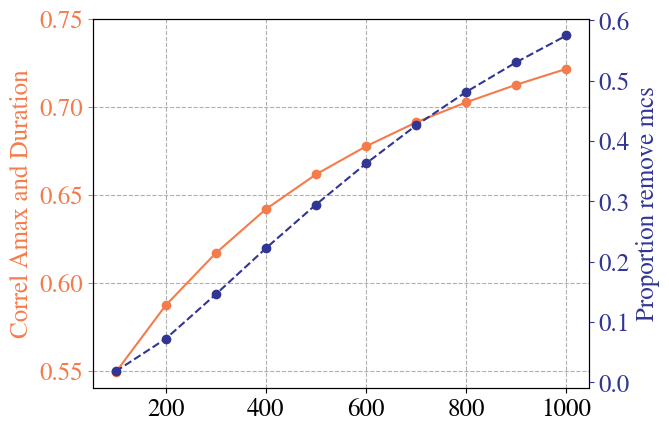

In [43]:
fig, ax = plt.subplots()
ax2=plt.twinx(ax)

color2=plt.get_cmap('RdYlBu', 10)(0.9)
ax2.tick_params(axis='y', colors=color2)
ax2.yaxis.label.set_color(color2)

color=plt.get_cmap('RdYlBu', 10)(0.2)
ax.tick_params(axis='y', colors=color)
ax.yaxis.label.set_color(color)

ax.plot(list_gradient_threshold, correl_list, '-o', color=color)
ax2.plot(list_gradient_threshold, remove_list, '--o', color=color2)



ax.grid(True,'both', ls='--')

idx_threshold=4
#ax.vlines(list_gradient_threshold[idx_threshold], 0.4,correl_list[0][idx_threshold])
#ax.hlines(correl_list[0][idx_threshold], 100,list_gradient_threshold[idx_threshold])
#ax2.hlines(remove_list[0][idx_threshold], list_gradient_threshold[idx_threshold],1000)

plt.xlabel('threshold in dadt')
ax2.set_ylabel('Proportion remove mcs')
ax.set_ylabel('Correl Amax and Duration')
ax.set_ylim(0.540, 0.750)

In [44]:

list_rolling_window = [1, 2, 3, 4, 5, 6]
list_gradient_threshold = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]

list_surf_end_prop = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6]

correl_list =[]
remove_list=[]
rolling=4
for i_frac,fraction_end in enumerate([0.1, 0.2,0.3, 0.4, 0.5]):
    remove_list.append([])
    correl_list.append([])
    for gradient_thresholf in list_gradient_threshold:
        validity_list, idx_start_list, idx_end_list = get_validity_lifecycles_start_end(list_valid_mcs, rolling_window=rolling, gradient_threshold=gradient_thresholf, fraction_max_end=fraction_end)
        duration_list = [(idx_end_list[i] - idx_start_list[i])*0.5 for i in range(len(validity_list)) if validity_list[i]]
        area_max_list = [np.max(list_valid_mcs[i].clusters.LC_surfkm2_235K) for i in range(len(validity_list)) if validity_list[i]]
        df = pd.DataFrame.from_dict({'duration':duration_list, 'maximal_extension':area_max_list})
        #list_corrle.append(df.corr()['duration']['maximal_extension'])

        proportion_remove = (len(validity_list)-np.sum(np.array(validity_list)*1))/len(validity_list)
        
        remove_list[i_frac].append(proportion_remove)
        correl_list[i_frac].append(df.corr()['duration']['maximal_extension'])
    


100%|██████████| 72965/72965 [00:04<00:00, 17624.52it/s]


(0.54, 0.75)

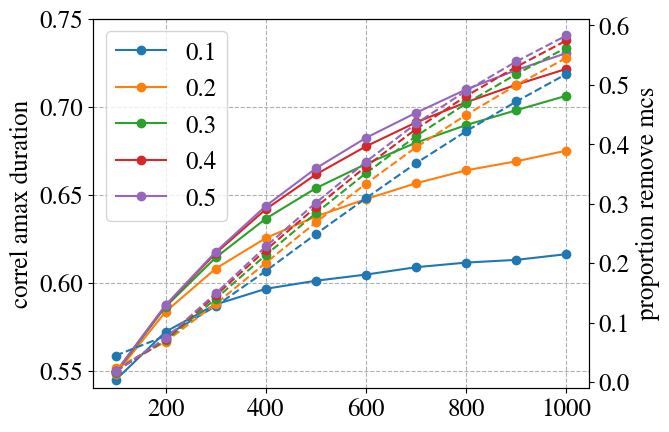

In [45]:
fig, ax = plt.subplots()
ax2=plt.twinx(ax)

for j in range(len(list_surf_end_prop)-1):
    ax.plot(list_gradient_threshold, correl_list[j], '-o', label=f'{list_surf_end_prop[j]}')
    ax2.plot(list_gradient_threshold, remove_list[j], '--o')
ax.grid(True,'both', ls='--')
idx_threshold=4
#ax.vlines(list_gradient_threshold[idx_threshold], 0.4,correl_list[0][idx_threshold])
#ax.hlines(correl_list[0][idx_threshold], 100,list_gradient_threshold[idx_threshold])
#ax2.hlines(remove_list[0][idx_threshold], list_gradient_threshold[idx_threshold],1000)

plt.xlabel('threshold in dadt')
ax2.set_ylabel('proportion remove mcs')
ax.set_ylabel('correl amax duration')
ax.legend()

ax.set_ylim(0.540, 0.750)

In [92]:

list_rolling_window = [1, 2, 3, 4, 5, 6]
list_gradient_threshold = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]

list_surf_end_prop = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6]

correl_list =[]
remove_list=[]
rolling=4
for i_frac,fraction_start in enumerate([0.1, 0.2,0.3, 0.4, 0.5]):
    remove_list.append([])
    correl_list.append([])
    for gradient_thresholf in list_gradient_threshold:
        validity_list, idx_start_list, idx_end_list = get_validity_lifecycles_start_end(list_valid_mcs, rolling_window=rolling, gradient_threshold=gradient_thresholf, fraction_max_start=fraction_start)
        duration_list = [(idx_end_list[i] - idx_start_list[i])*0.5 for i in range(len(validity_list)) if validity_list[i]]
        area_max_list = [np.max(list_valid_mcs[i].clusters.surfkm2_172Wm2) for i in range(len(validity_list)) if validity_list[i]]
        df = pd.DataFrame.from_dict({'duration':duration_list, 'maximal_extension':area_max_list})
        #list_corrle.append(df.corr()['duration']['maximal_extension'])

        proportion_remove = (len(validity_list)-np.sum(np.array(validity_list)*1))/len(validity_list)
        
        remove_list[i_frac].append(proportion_remove)
        correl_list[i_frac].append(df.corr()['duration']['maximal_extension'])
    


100%|██████████| 58901/58901 [00:02<00:00, 28306.56it/s]


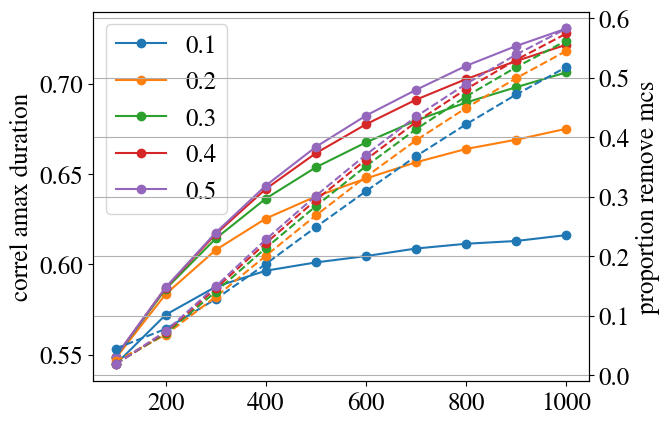

In [46]:
fig, ax = plt.subplots()
ax2=plt.twinx(ax)

for j in range(len(list_surf_end_prop)-1):
    ax.plot(list_gradient_threshold, correl_list[j], '-o', label=f'{list_surf_end_prop[j]}')
    ax2.plot(list_gradient_threshold, remove_list[j], '--o')
plt.grid(True)
idx_threshold=4
#ax.vlines(list_gradient_threshold[idx_threshold], 0.4,correl_list[0][idx_threshold])
#ax.hlines(correl_list[0][idx_threshold], 100,list_gradient_threshold[idx_threshold])
#ax2.hlines(remove_list[0][idx_threshold], list_gradient_threshold[idx_threshold],1000)

plt.xlabel('threshold in dadt')
ax2.set_ylabel('proportion remove mcs')
ax.set_ylabel('correl amax duration')
ax.legend()

In [94]:

list_rolling_window = [1, 2, 3, 4, 5, 6]
list_gradient_threshold = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
correl_matrix = np.zeros((len(list_rolling_window), len(list_gradient_threshold)))

for i, rolling in enumerate(list_rolling_window):
    for j ,gradient_thresholf in enumerate(list_gradient_threshold):
        validity_list, idx_start_list, idx_end_list = get_validity_lifecycles_start_end(list_valid_mcs, rolling_window=rolling, gradient_threshold=gradient_thresholf)
        duration_list = [(idx_end_list[i] - idx_start_list[i])*0.5 for i in range(len(validity_list)) if validity_list[i]]
        area_max_list = [np.max(list_valid_mcs[i].clusters.surfkm2_172Wm2) for i in range(len(validity_list)) if validity_list[i]]
        df = pd.DataFrame.from_dict({'duration':duration_list, 'maximal_extension':area_max_list})
        #list_corrle.append(df.corr()['duration']['maximal_extension'])
        correl_matrix[i,j] = df.corr()['duration']['maximal_extension']


100%|██████████| 58901/58901 [00:01<00:00, 31468.59it/s]


In [48]:
list_rolling_window = [1, 2, 3, 4, 5, 6]
list_gradient_threshold = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
correl_matrix = np.zeros((len(list_rolling_window), len(list_gradient_threshold)))
remove_matrix = np.zeros((len(list_rolling_window), len(list_gradient_threshold)))
for i, rolling in enumerate(list_rolling_window):
    for j ,gradient_thresholf in enumerate(list_gradient_threshold):
        validity_list, idx_start_list, idx_end_list = get_validity_lifecycles_start_end(list_valid_mcs, rolling_window=rolling, gradient_threshold=gradient_thresholf)
        duration_list = [(idx_end_list[i] - idx_start_list[i])*0.5 for i in range(len(validity_list)) if validity_list[i]]
        area_max_list = [np.max(list_valid_mcs[i].clusters.LC_surfkm2_235K) for i in range(len(validity_list)) if validity_list[i]]
        df = pd.DataFrame.from_dict({'duration':duration_list, 'maximal_extension':area_max_list})
        #list_corrle.append(df.corr()['duration']['maximal_extension'])
        correl_matrix[i,j] = df.corr()['duration']['maximal_extension']
        proportion_remove = (len(validity_list)-np.sum(np.array(validity_list)*1))/len(validity_list)
        remove_matrix[i,j] = proportion_remove

100%|██████████| 72965/72965 [00:03<00:00, 19691.10it/s]


In [49]:
heatmap7=sns.heatmap(correl_matrix, annot=True)

NameError: name 'sns' is not defined

In [ ]:
validity_list, idx_start_list, idx_end_list = get_validity_lifecycles_start_end(list_valid_mcs, rolling_window=4, gradient_threshold=500, fraction_max_start=0.4)
duration_list = [(idx_end_list[i] - idx_start_list[i])*0.5 for i in range(len(validity_list)) if validity_list[i]]
area_max_list = [np.max(list_valid_mcs[i].clusters.LC_surfkm2_235K) for i in range(len(validity_list)) if validity_list[i]]
df = pd.DataFrame.from_dict({'duration':duration_list, 'maximal_extension':area_max_list})


In [98]:
#area_max_list = np.sqrt(area_max_list)
df_new = pd.DataFrame.from_dict({'duration':duration_list, 'maximal_extension':area_max_list})


In [101]:
xy = np.vstack([duration_list,area_max_list])
z = gaussian_kde(xy)(xy)
df_new_with_kde = pd.DataFrame.from_dict({'duration':duration_list, 'maximal_extension':area_max_list, 'kde':z})


In [104]:
duration_list, area_max_list = np.array(duration_list), np.array(area_max_list)

[]

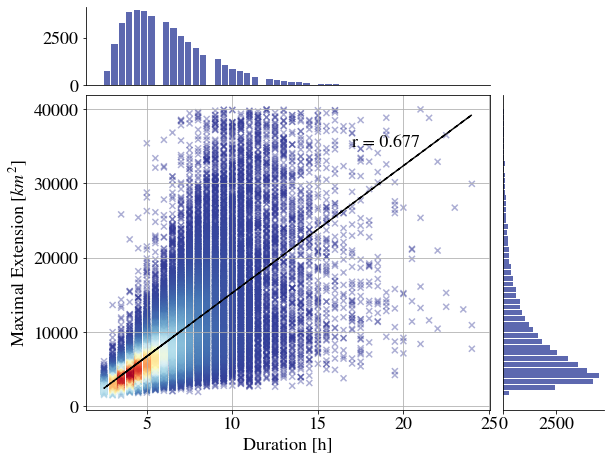

In [111]:
fig = plt.figure(figsize=(9,7))

gs = fig.add_gridspec(2, 2,  width_ratios=(4, 1), height_ratios=(1, 4),
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.05, hspace=0.05)
# Create the Axes.
ax = fig.add_subplot(gs[1, 0])
ax_histx = fig.add_subplot(gs[0, 0], )#sharex=ax, )
ax_histy = fig.add_subplot(gs[1, 1], )#sharey=ax, )



m, b = np.polyfit(duration_list, area_max_list, 1)

ax.scatter(duration_list, area_max_list, c=z, marker='x', alpha=0.4, cmap='RdYlBu_r')
ax.plot(duration_list, m*duration_list+b, color='k', ls='--')
ax.set_xlabel('Duration [h]')

ax.set_ylabel(r'Maximal Extension [$km^2$]')
r = np.round(df.corr()['duration']['maximal_extension'], 3)
ax.text(17, 35000, f'r = {r}', color='k')
ax.grid(True)

color=plt.get_cmap('RdYlBu')(0.98)

ax_histx.hist(duration_list, bins=50, alpha=0.8, rwidth=0.85, color=color)
ax_histy.hist(area_max_list, bins=50, orientation='horizontal', alpha=0.8, rwidth=0.85, color=color)
ax_histx.spines[['right', 'top']].set_visible(False)
ax_histy.spines[['right', 'top']].set_visible(False)


ax_histx.set_xticks([])
ax_histy.set_yticks([])


#ax.set_xticks(np.linspace(np.min(arr_duration_all), np.max(arr_duration_all), 5))
#ax.set_yticks(np.linspace(np.min(arr_surf_max_all), np.max(arr_surf_max_all), 5))


OptionError: "No such keys(s): 'mode.use_inf_as_null'"

<Figure size 720x504 with 0 Axes>

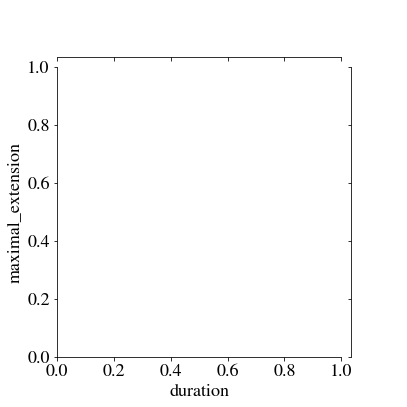

In [100]:
fig = plt.figure(figsize=(10,7))

sns.jointplot(data=df_new, x="duration", y="maximal_extension",kind="reg", marker='x', scatter_kws=dict(alpha=0.4, color='tab:orange'),  marginal_kws=dict(bins=30), line_kws={"color": "orange", "linestyle":"--"})

r = np.round(df_new.corr()['duration']['maximal_extension'], 3)
plt.text(18, 40000, f'r = {r}', color='k')

#sns.residplot(data=df, x="duration", y="maximal_extension",lowess=True, color='tab:blue')
# Title and labels.
#plt.title('Residual plot 500 females')
plt.xlabel('Duration [h]')
plt.ylabel(r'Maximal Extension [$km^2$]')

In [ ]:
validity_list = np.array(validity_list)

In [ ]:
arr_valid

In [ ]:
validity_list_0_1 = validity_list*1
df_comparison = pd.DataFrame.from_dict({'duration':arr_duration_all, 'maximal_extension':arr_surf_max_all, 'validity_mcs' :validity_list_0_1})


In [ ]:
df_comparison

Text(38.847222222222214, 0.5, 'Maximal Extension [$km^2$]')

<Figure size 1000x700 with 0 Axes>

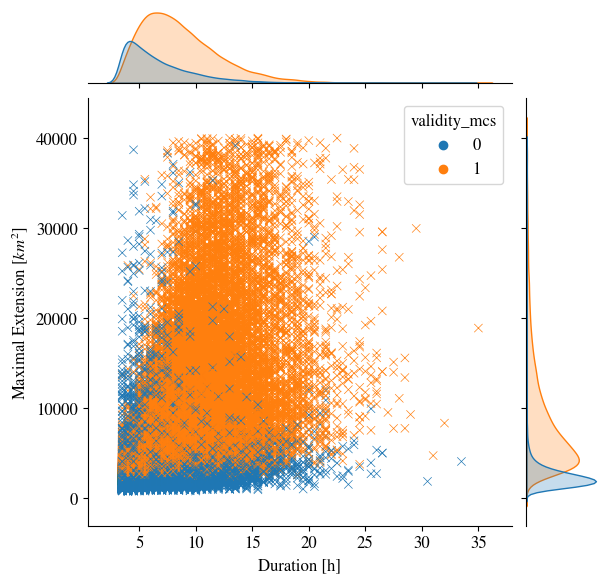

In [33]:
fig = plt.figure(figsize=(10,7))
sns.jointplot(data=df_comparison, x="duration", y="maximal_extension",hue="validity_mcs",  marker='x' )

#r = np.round(df.corr()['duration']['maximal_extension'], 3)
#plt.text(30, 35000, f'r = {r}', color='orange')

plt.xlabel('Duration [h]')
plt.ylabel(r'Maximal Extension [$km^2$]')